In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import timedelta
from collections import defaultdict
DT_int = 14
today = pd.to_datetime('today').date()
yday = today - timedelta(days=1)
DT = timedelta(days=DT_int)
Z=20

In [2]:
cols = ['date', 'new_cases_per_million', 'new_cases', 'new_tests', 'population', 'continent', 'location']
col_types = defaultdict(int)
col_types['continent'] = 'str'
col_types['location'] = 'str'
covid = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", usecols=cols, dtype=col_types, parse_dates=['date'], index_col='date')

In [3]:
covid = covid[covid.continent=='Europe'].drop(['continent'], axis=1)

In [4]:
data = covid[covid.location == 'Italy'].drop(['location'], axis=1)
pop = data.loc[data.population.notna(),'population'].loc[yday]
data.drop(['population'], axis=1, inplace=True)

In [5]:
#Only for Italy
data[['new_cases', 'new_cases_per_million']] = data[['new_cases', 'new_cases_per_million']].shift(-1)

In [6]:
data = data.loc[:yday]

In [7]:
data['NCI'] = data['new_cases_per_million'].rolling(DT_int).sum()/10
data['PPT'] = (data['new_cases'].divide(data['new_tests'])*100).rolling(DT_int).mean()
data

,new_cases,new_cases_per_million,new_tests,NCI,PPT
date,,,,,
2019-12-31,0.0,0.000,NaN,NaN,NaN
2020-01-01,0.0,0.000,NaN,NaN,NaN
2020-01-02,0.0,0.000,NaN,NaN,NaN
2020-01-03,0.0,0.000,NaN,NaN,NaN
2020-01-04,0.0,0.000,NaN,NaN,NaN
...,...,...,...,...,...
2020-07-28,202.0,3.341,25341.0,5.2000,0.888485
2020-07-29,288.0,4.763,30875.0,5.4084,0.914357
2020-07-30,382.0,6.318,33396.0,5.6598,0.937573


In [8]:
date_ini = '2020-01-01'
dates = pd.date_range(date_ini, yday, periods=10)
dates_mini = pd.date_range(date_ini, yday, periods=19)
dateticks = [t.strftime('%b-%d') for t in dates]
data_keep = data.loc[data.index>date_ini]

In [9]:
new_cases_warn = int(20*pop/(100000*14))

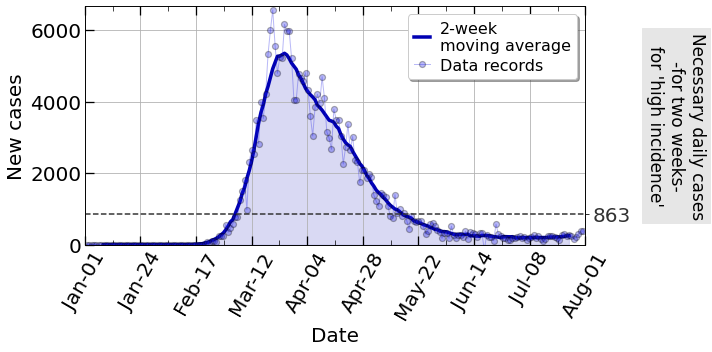

In [10]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.tick_params('both', which='both', labelsize=Z, top=True, right=True, direction='in')
ax.tick_params('both', which='major', length=9, width=1.3)
ax.tick_params('both', which='minor', length=5, width=0.7)
ax.set_xlabel('Date', fontsize=Z)
ax.set_ylabel('New cases', fontsize=Z)
ax.set_xticks(dates)
ax.set_xticks(dates_mini, minor=True)
ax.set_xticklabels(dateticks, rotation=60)
ax.set_xlim((dates[0], dates[-1]))
ax.set_ylim((0, data_keep.new_cases.max()+100))
ax.fill_between(data_keep.index, 0, data_keep.new_cases.rolling(DT_int, center=True).mean(), alpha=0.15, color=(0,0,0.7))
ax.errorbar(data_keep.index, data_keep.new_cases.rolling(DT_int, center=True).mean(), lw=3.5, c=(0,0,0.7), label="2-week\nmoving average")
ax.errorbar(data_keep.index, data_keep.new_cases, alpha=0.3, c=(0.1,0.1,0.9), fmt='o-', markevery=1, mec='k', mew=1.2, lw=1, label='Data records')
ax.legend(fontsize=Z-4, shadow=True, fancybox=True, labelspacing=0.3, handlelength=1, handletextpad=0.6, borderpad=0.4)
ax.grid()

ax1 = ax.twinx()
ax1.set_ylabel("Necessary daily cases\n-for two weeks-\nfor 'high incidence'", rotation=270, fontsize=Z-3, backgroundcolor=(0.9,0.9,0.9), labelpad=75)
ax1.axhline(new_cases_warn, lw=1.5, c=(0.2,0.2,0.2), ls='--')
ax1.set_ylim((0, data_keep.new_cases.max()+100))
ax1.set_yticks([new_cases_warn])
ax1.tick_params(labelsize=Z, labelcolor=(0.2,0.2,0.2))
plt.tight_layout()
plt.savefig("New_cases.png", format='png', dpi=300)
plt.show()

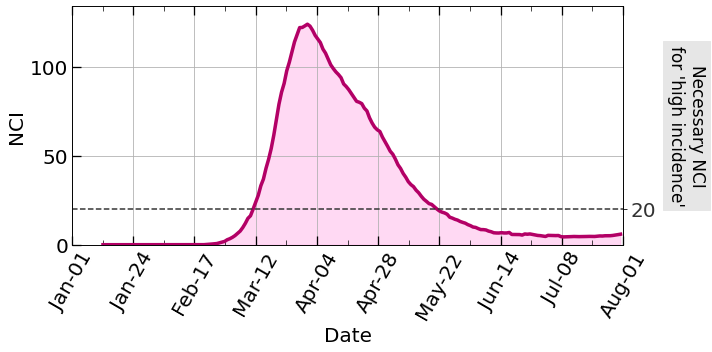

In [11]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.tick_params('both', which='both', labelsize=Z, top=True, right=True, direction='in')
ax.tick_params('both', which='major', length=9, width=1.3)
ax.tick_params('both', which='minor', length=5, width=0.7)
ax.set_xlabel('Date', fontsize=Z)
ax.set_ylabel('NCI', fontsize=Z)
ax.set_xticks(dates)
ax.set_xticks(dates_mini, minor=True)
ax.set_xticklabels(dateticks, rotation=60)
ax.set_xlim((dates[0], dates[-1]))
ax.set_ylim((0, max(25, data_keep.NCI.max()+10)))
ax.fill_between(data_keep.index, 0, data_keep.NCI, alpha=0.15, color=(1,0,0.7))
ax.errorbar(data_keep.index, data_keep.NCI, lw=3.5, c=(0.7,0,0.4))#, label="2-week\nmoving average")
ax.grid()

ax1 = ax.twinx()
ax1.axhline(20, lw=1.5, c=(0.2,0.2,0.2), ls='--')
ax1.set_ylim((0, max(25, data_keep.NCI.max()+10)))
ax1.set_yticks([20])
ax1.tick_params(labelsize=Z, labelcolor=(0.2,0.2,0.2))
ax1.set_ylabel("Necessary NCI\nfor 'high incidence'", rotation=270, fontsize=Z-3, backgroundcolor=(0.9,0.9,0.9), labelpad=50)
plt.tight_layout()
plt.savefig("NCI.png", format='png', dpi=300)

plt.show()

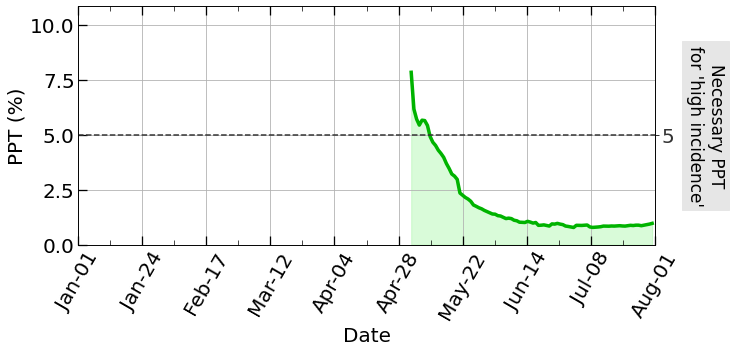

In [12]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.tick_params('both', which='both', labelsize=Z, top=True, right=True, direction='in')
ax.tick_params('both', which='major', length=9, width=1.3)
ax.tick_params('both', which='minor', length=5, width=0.7)
ax.set_xlabel('Date', fontsize=Z)
ax.set_ylabel('PPT (%)', fontsize=Z)
ax.set_xticks(dates)
ax.set_xticks(dates_mini, minor=True)
ax.set_xticklabels(dateticks, rotation=60)
ax.set_xlim((dates[0], dates[-1]))
ax.set_ylim((0, max(8, data_keep.PPT.max()+3)))
ax.fill_between(data_keep.index, 0, data_keep.PPT, alpha=0.15, color=(0,0.9,0))
ax.errorbar(data_keep.index, data_keep.PPT, lw=3.5, c=(0,0.7,0))#, label="2-week\nmoving average")
ax.grid()

ax1 = ax.twinx()
ax1.axhline(5, lw=1.5, c=(0.2,0.2,0.2), ls='--')
ax1.set_ylim((0, max(5, data_keep.PPT.max()+3)))
ax1.set_yticks([5])
ax1.tick_params(labelsize=Z, labelcolor=(0.2,0.2,0.2))
ax1.set_ylabel("Necessary PPT\nfor 'high incidence'", rotation=270, fontsize=Z-3, backgroundcolor=(0.9,0.9,0.9), labelpad=50)
plt.tight_layout()
plt.savefig("PPT.png", format='png', dpi=300)
plt.show()

In [22]:
mask_completeness = data.isna().sum(axis=1)==0
latest_avail = data.loc[mask_completeness].iloc[-1].name
latest_avail

Timestamp('2020-07-31 00:00:00')

In [25]:
covid[covid.location=='Germany']

,location,new_cases,new_cases_per_million,new_tests,population
date,,,,,
2019-12-31,Germany,0.0,0.000,NaN,83783945.0
2020-01-01,Germany,0.0,0.000,NaN,83783945.0
2020-01-02,Germany,0.0,0.000,NaN,83783945.0
2020-01-03,Germany,0.0,0.000,NaN,83783945.0
2020-01-04,Germany,0.0,0.000,NaN,83783945.0
...,...,...,...,...,...
2020-07-28,Germany,633.0,7.555,NaN,83783945.0
2020-07-29,Germany,684.0,8.164,NaN,83783945.0
2020-07-30,Germany,902.0,10.766,NaN,83783945.0
